# Scenario:
#### Analyze the impact of two anti-anxitey medications on memory recall in an island population
#### * compared to a placebo ( "placebo effect," where their condition improves due to their belief in the treatment, triggering brain-body healing responses for symptoms like pain.)
#### * Affect memory performance
#### * Understand Impact of taking sample

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"E:\ucan open\Islander_data.csv")

In [3]:
df.shape

(1188, 10)

#### observation
##### 1188 rows and 10 columns

#### checking NULL Values

In [4]:
df.isnull().sum()

Unnamed: 0          0
index               0
first_name          0
last_name           0
age                 0
Happy_Sad_group     0
Dosage              0
Drug                0
Mem_Score_Before    0
Mem_Score_After     0
dtype: int64

## create sample

In [5]:
df_smpl = df.sample(n=50,random_state=42)
df_smpl.shape

(50, 10)

In [6]:
df_pplt = df.drop(df_smpl.index)

In [7]:
df_pplt.shape

(1138, 10)

#### we can now simulate the effect of Sampling 

In [8]:
df_pplt.head()

,Unnamed: 0,index,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After
0,0,150,Daichi,Steiner,37,S,1,T,64.2,57.3
1,1,26,Kaito,Carrasco,35,S,2,A,75.0,82.9
2,2,93,Sara,Castro,35,H,2,S,46.0,43.2
3,3,115,Ryouta,Carrasco,49,H,3,S,62.8,54.1
4,4,55,Daichi,Gonzalez,68,H,3,A,41.9,67.4


In [9]:
df_smpl.drop('Unnamed: 0',axis=1,inplace=True)
df_pplt.drop('Unnamed: 0',axis=1,inplace=True)

### Observation 
#### Remove index while Saving the csv file 

#### this can also be achived during inputing csv file by giving pd.read_csv("PATH",index=0). 

In [10]:
df_pplt.head()

,index,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After
0,150,Daichi,Steiner,37,S,1,T,64.2,57.3
1,26,Kaito,Carrasco,35,S,2,A,75.0,82.9
2,93,Sara,Castro,35,H,2,S,46.0,43.2
3,115,Ryouta,Carrasco,49,H,3,S,62.8,54.1
4,55,Daichi,Gonzalez,68,H,3,A,41.9,67.4


# EDA

#### pallete  = ['#FF7F50','#008080','#FFD700']  

# Feature Engineering Memory Change
#### If we think about what this dataset about an intresting question we could ask ourselves is ,
### Q. what is the effect or change in memory while using each drug

In [11]:
pallete = ['#FF7F50','#008080','#FFD700']

In [12]:
df_smpl["Diff_Mem_score"] = df_smpl["Mem_Score_After"] - df_smpl["Mem_Score_Before"]
df_pplt["Diff_Mem_score"] = df_pplt["Mem_Score_After"] - df_pplt["Mem_Score_Before"]

<AxesSubplot:title={'center':'Diffrence in Memory Score Sample'}, ylabel='Frequency'>

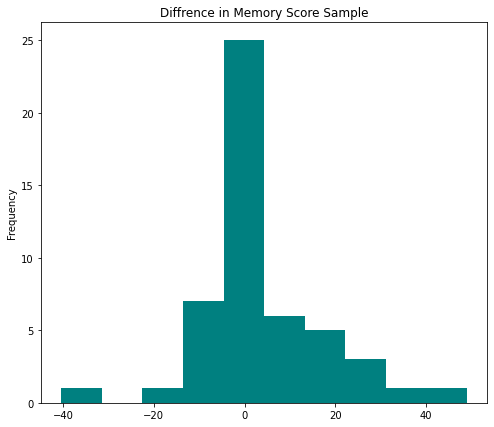

In [13]:
df_smpl["Diff_Mem_score"].plot(kind='hist',color = pallete[1],
                               title = "Diffrence in Memory Score Sample",
                               figsize = (8,7))

<AxesSubplot:title={'center':'Diffrence in Memory Score Sample'}, ylabel='Frequency'>

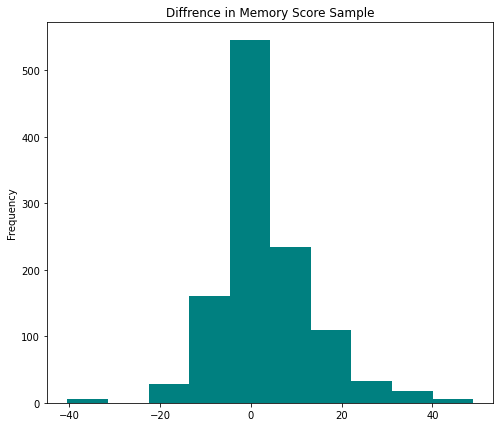

In [14]:
df_pplt["Diff_Mem_score"].plot(kind='hist',color = pallete[1],
                               title = "Diffrence in Memory Score Sample",
                               figsize = (8,7))

### Observation 
#### the change in memory scores resembles a normal Distribution 

In [15]:
df_pplt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1138 entries, 0 to 1187
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             1138 non-null   int64  
 1   first_name        1138 non-null   object 
 2   last_name         1138 non-null   object 
 3   age               1138 non-null   int64  
 4   Happy_Sad_group   1138 non-null   object 
 5   Dosage            1138 non-null   int64  
 6   Drug              1138 non-null   object 
 7   Mem_Score_Before  1138 non-null   float64
 8   Mem_Score_After   1138 non-null   float64
 9   Diff_Mem_score    1138 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 97.8+ KB


### Observation
#### index:uniform distribution
#### last_name :  Durand and Carrasco appears for frequently as their count are near 250 
#### age : Weak exponential distribution
#### happy_Sad_group : Balanced Classes
#### Dosage : integers only , 3 values could be category feature
#### Drug : equal balaced 3 classes
#### Mem_Score_Before : semi normal with slight right tail
#### Mem_Scoere_After : semi normal with slight right tail
#### Diff_Mem_score : semi normal with outlers on both side

## Analysis by Happy_sad_Group :
### let's see being Happy or sad would have an effect on memory 

Text(0.5, 1.0, 'Happy_Sad_group')

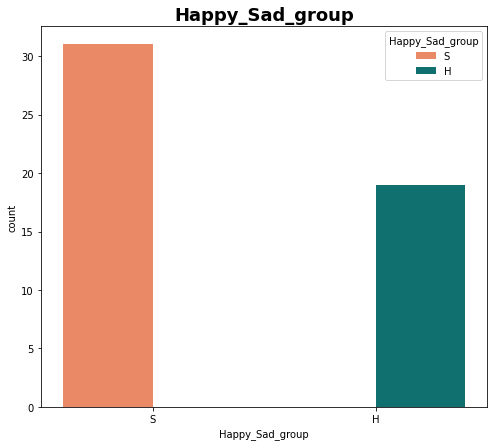

In [16]:
plt.figure(figsize = (8,7))
sns.countplot(data=df_smpl , x='Happy_Sad_group',hue='Happy_Sad_group',palette=pallete)
plt.title('Happy_Sad_group' ,fontsize=18,fontweight='bold')

In [17]:
pallette_map = {'S': '#FF7F50', 'H': '#008080'}

# observation 
### last_name : cascaro have disposition for happy and Durand for Sad 
###   *could be related to family Genitics*
### age : no effect on Happy and Sad group
### dosage :no effect on Happy and Sad group
### drug : no effect on Happy and Sad group
### Mem_Score_Before :no effect on Happy and Sad group
### Mem_Score_After :no effect on Happy and Sad group
### Diff_Mem_Score :no effect on Happy and Sad group
## Emotional State in terms of happy and sad doesn't have a strong relationship with any other features directly

# Analysis by Drug 

### The main question we would want answer on this dataset is, did drug affect the capacities of islanders?
 

<AxesSubplot:title={'center':'Drug'}>

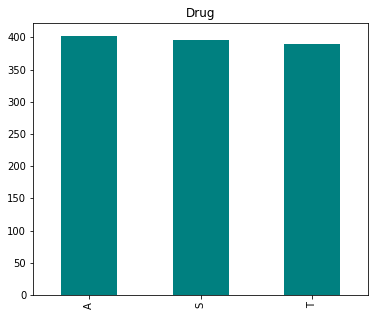

In [21]:
df['Drug'].value_counts().plot(kind='bar',title='Drug',color = pallete[1],figsize=(6,5))

In [25]:
pallete = ['#FF7F50','#008080','#FFD700']

#### Drug S (Yellow - The "Nothing" Drug): This is a sugar pill (placebo). As you'd expect, most people's scores didn't change much, staying clustered around 0. There is one "weird" person (an outlier) who did much worse, scoring around -40, but most people stayed in the middle.
#### Drug T (Teal - The "Steady" Drug): Most people who took this drug saw a very small improvement or no change at all. Their scores are tightly packed in a tall tower right around 0 to 5. It didn't seem to make a huge difference for most.
#### Drug A (Peach - The "Wildcard" Drug): This drug has the widest spread. While many people stayed around 0, a lot of people actually got better at the memory test, with their scores spreading out to the right (up to +50). It seems to have the most noticeable impact on increasing scores, though it’s less predictable than the others.

### What the "Humplike" Lines Mean
#### The smooth curved lines (called density curves) show the general "shape" of the data for each drug:
#### Teal line (Drug T): A very sharp, narrow peak, meaning most people had almost the exact same result.
#### Yellow line (Drug S): A lower, flatter bump, showing scores were mostly near zero but had a bit more variety.
#### Peach line (Drug A): A long, low hill that stretches far to the right, showing that this drug led to a wide variety of improved scores

## Analysis by age category 
#### Age would likely affect our body resistance to drug but that relation could not be linear .A continouse feature allows us to do this

<AxesSubplot:ylabel='Frequency'>

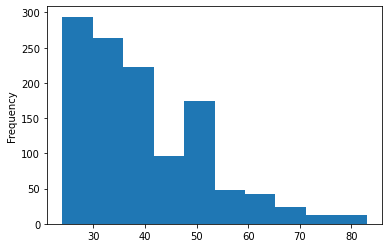

In [28]:
df['age'].plot(kind='hist')

In [29]:
def age_to_cat (x):
    if x>55:
        value='Senior'
    elif x<35:
        value='Young'
    else:
        value='adult'
    return value

In [32]:
df_smpl['age_cat'] = df_smpl['age'].apply(age_to_cat)
df_pplt['age_cat'] = df_pplt['age'].apply(age_to_cat)
df_smpl['age_cat'].head()

319      adult
1156     adult
907      adult
86      Senior
936      Young
Name: age_cat, dtype: object

# Observation
### Slightly more A Drug was given to adults
### A smaller portion of Adults were highly Impacted by Drugs, for adults the impact was positive
### for Younger and Older islanders the outlier effects where less clearly either positive or negative 

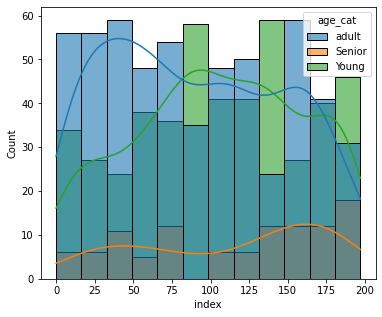

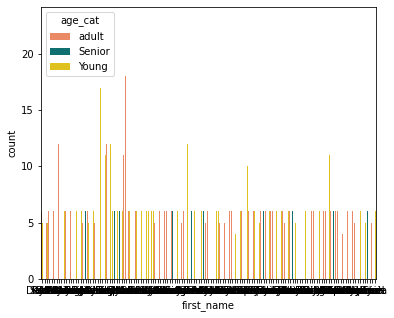

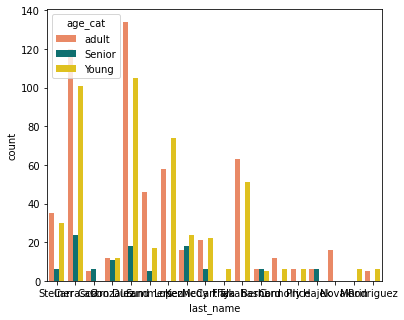

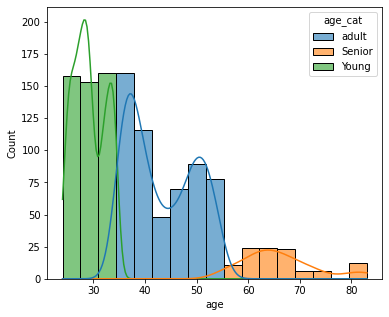

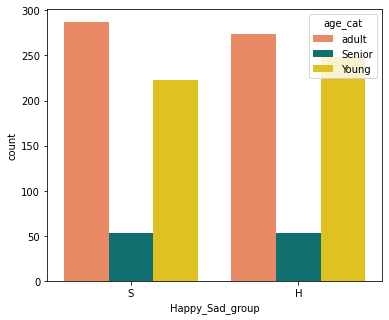

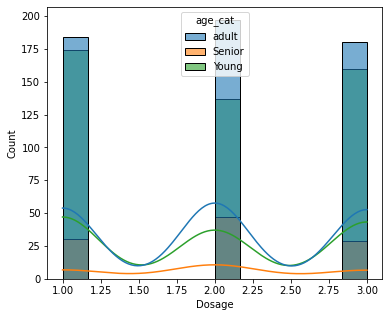

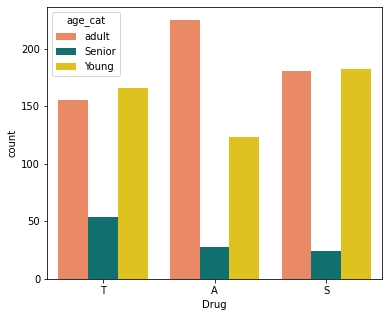

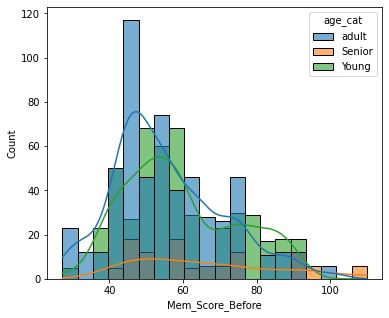

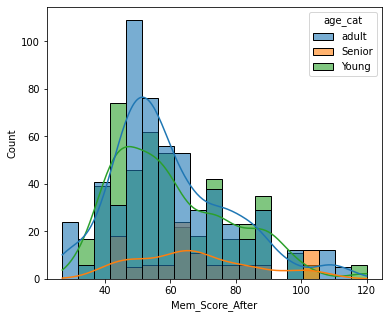

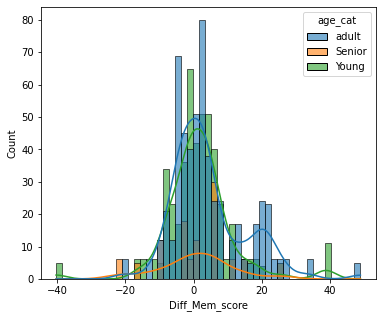

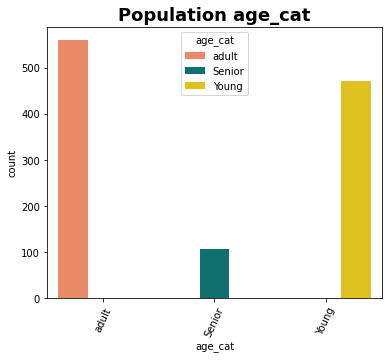

In [42]:
for feat in df_pplt.columns:
   plt.figure(figsize=(6,5))
   if df_pplt[feat].dtype == 'object':
      sns.countplot(data=df_pplt,hue='age_cat',x=feat, palette=pallete )
   else:
        sns.histplot(data=df_pplt,x=feat,hue='age_cat',kde=True,alpha=.6)
plt.title('Population'+ ' ' +feat,fontsize=18,fontweight='bold')
plt.xticks(rotation=65)
plt.show()
    
    
            

#### "Looking at the sample we only see a hint of positive impact of Drug on memory"

#### Intresting Here is that having a small sample made it extremly difficult to tell what could ptentially be the pattern and worth looking deeper into . this is something we should keep in mind while completing an analysis on a sample